In [4]:
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
gsea_df = pd.read_csv('../exp/GSEA_qvalues.csv', index_col = 0)
wall_df = pd.read_csv('../exp/pathway_qvalues.csv', index_col = 0)
wall_df

,Cluster 1 p-values,Cluster 1 q-values,Cluster 10 p-values,Cluster 10 q-values,Cluster 2 p-values,Cluster 2 q-values,Cluster 3 p-values,Cluster 3 q-values,Cluster 4ER+ p-values,Cluster 4ER+ q-values,...,Cluster 5 p-values,Cluster 5 q-values,Cluster 6 p-values,Cluster 6 q-values,Cluster 7 p-values,Cluster 7 q-values,Cluster 8 p-values,Cluster 8 q-values,Cluster 9 p-values,Cluster 9 q-values
Interleukin-6 signaling,3.285109,2.896183,7.090792,6.909434,1.685785,1.207825,4.171840,3.813117,10.622985,10.125721,...,2.845952,2.505034,2.971081,2.320790,1.132267,1.027113,7.408501,7.088204,4.720522,4.144865
Apoptosis,4.498541,4.022465,59.011315,58.237332,0.370636,0.336449,6.374748,5.880107,0.551906,0.522675,...,3.845343,3.417836,0.386531,0.353928,11.961576,11.101133,24.478288,23.662539,0.488162,0.433804
Hemostasis,2.781245,2.425857,30.312820,29.862299,2.357832,1.626484,0.836917,0.759157,21.128807,20.215119,...,4.696436,4.205053,5.017376,3.910083,12.755542,11.815310,46.742077,45.106510,3.388050,2.943398
Intrinsic Pathway for Apoptosis,1.011234,0.859075,88.170630,86.999949,0.910047,0.676740,5.347793,4.906045,6.451754,6.112669,...,6.941377,6.293885,0.392107,0.356786,20.312605,18.751671,9.487835,9.116495,0.383176,0.356847
PKB-mediated events,2.579178,2.250036,4.394060,4.258809,0.479164,0.401905,1.335432,1.199609,8.372921,7.969927,...,1.591553,1.381615,1.307871,1.048555,5.709229,5.306763,9.151857,8.788808,1.209177,1.026546
PI3K Cascade,0.957920,0.812253,0.444977,0.429359,2.285641,1.579511,4.363149,3.986359,7.142278,6.780676,...,27.899697,25.905107,4.568495,3.575969,1.091689,0.990253,3.866813,3.653466,5.023131,4.414744
MAPK3 (ERK1) activation,1.432050,1.222451,26.773305,26.367121,0.636747,0.502353,0.446846,0.422736,4.480442,4.223954,...,1.457490,1.265511,0.957759,0.771927,10.219118,9.495596,15.275903,14.755668,1.874568,1.596379
Translesion synthesis by REV1,4.964875,4.450840,61.313138,60.512203,2.240729,1.552309,9.543941,8.937250,17.427209,16.658175,...,0.612611,0.551557,2.040296,1.619010,1.932976,1.758556,3.350193,3.159190,1.036675,0.881234
Translesion synthesis by Y family DNA polymerases bypasses lesions on DNA template,15.281922,14.068917,79.522450,78.506671,2.603562,1.802627,24.192525,23.087904,36.949397,35.586830,...,9.012861,8.235128,2.965758,2.318267,7.926126,7.369740,7.127438,6.813658,6.548455,5.803355
Recognition of DNA damage by PCNA-containing replication complex,11.334900,10.331958,78.173206,77.178616,2.967254,2.053566,17.409878,16.526038,38.343869,36.930150,...,4.492600,4.008938,2.169216,1.718350,5.396718,5.012890,4.061182,3.842135,4.925147,4.327670


In [6]:
gsea_df_counts = {}

for column in gsea_df.columns:
    columnshape = gsea_df[gsea_df[column] >= 3].shape[0]
    print(columnshape)
    gsea_df_counts[column] = columnshape

126
11
102
177
23
41
21
94
64
1
89


In [22]:
wall_df_counts = {}

for column in wall_df.columns:
    print(column)
    columnshape = wall_df[wall_df[column] >= 3].shape[0]
    print(columnshape)
    wall_df_counts[column] = columnshape

Cluster 1 p-values
880
Cluster 1 q-values
828
Cluster 10 p-values
1624
Cluster 10 q-values
1615
Cluster 2 p-values
247
Cluster 2 q-values
78
Cluster 3 p-values
1093
Cluster 3 q-values
1048
Cluster 4ER+ p-values
1328
Cluster 4ER+ q-values
1303
Cluster 4ER- p-values
1075
Cluster 4ER- q-values
1029
Cluster 5 p-values
905
Cluster 5 q-values
839
Cluster 6 p-values
457
Cluster 6 q-values
290
Cluster 7 p-values
1168
Cluster 7 q-values
1126
Cluster 8 p-values
1383
Cluster 8 q-values
1354
Cluster 9 p-values
792
Cluster 9 q-values
723


In [24]:
wal_df = wall_df.loc[:, wall_df.columns.str.endswith('q-values')]
new_name = {}
for i in wal_df.columns:
    new_i = i.strip('Cluster q-values')
    new_name[i] = new_i
    
wal_df = wal_df.rename(columns =new_name)

wall_df_counts = {}
for column in wal_df.columns:
    columnshape = wal_df[wal_df[column] >= 3].shape[0]
    print(columnshape)
    wall_df_counts[column] = columnshape

wall_df_counts['4ER-'] = wall_df_counts.pop('4ER')
wall_df_counts

828
1615
78
1048
1303
1029
839
290
1126
1354
723


{'1': 828,
 '10': 1615,
 '2': 78,
 '3': 1048,
 '4ER+': 1303,
 '5': 839,
 '6': 290,
 '7': 1126,
 '8': 1354,
 '9': 723,
 '4ER-': 1029}

In [26]:
anova_df_counts = {'1': 725, '2': 39, '3': 959, '4ER+': 1196, '4ER-': 961, 
                   '5': 650, '6': 218, '7': 1150, '8': 1313, '9': 581, '10': 1571}

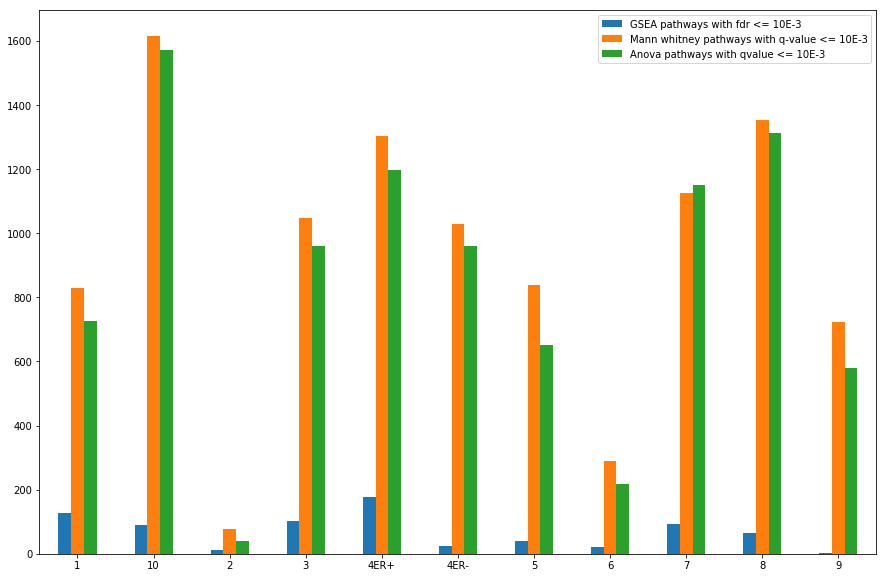

In [29]:
full_df = pd.DataFrame({'GSEA pathways with fdr <= 10E-3': gsea_df_counts, 
                       'Mann whitney pathways with q-value <= 10E-3': wall_df_counts,
                       'Anova pathways with qvalue <= 10E-3': anova_df_counts})
ax = full_df.plot.bar(rot=0, figsize=(15, 10))
ax

In [30]:
fig = ax.get_figure()
fig.savefig('gsea_wall_anova_comparison.png')